In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
pd.set_option('display.max_columns', 500)

In [6]:
df = pd.read_parquet("/content/drive/MyDrive/datathon - final/full_data.parquet")

In [7]:
df.head()

,event_id,session_id,transaction_date,event_type_id,product_id,title_product_id,country_code_id,ip_address,auth_session_id
0,0,3507032552,2020-08-20,4,63795519,63077424,162,238.108.111.146,2668673246
1,1,3506994387,2020-08-20,5,193402914,63110659,148,32.129.93.188,2668641289
2,2,3507038875,2020-08-20,5,202835637,63108769,517,222.60.132.210,2668676616
3,3,3507038876,2020-08-20,7,63109557,63109558,351,22.28.25.247,2668676617
4,4,3507036177,2020-08-20,4,69817018,63129191,162,138.169.123.254,2668677577


In [8]:
df.shape

(6044797, 9)

In [9]:
df.info(null_counts=True)

<ipython-input-9-acd3301a9435>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6044797 entries, 0 to 6044796
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   event_id          6044797 non-null  int64         
 1   session_id        6044797 non-null  object        
 2   transaction_date  6044797 non-null  datetime64[ns]
 3   event_type_id     6043230 non-null  object        
 4   product_id        6044797 non-null  int64         
 5   title_product_id  6044797 non-null  int64         
 6   country_code_id   6044462 non-null  object        
 7   ip_address        6044797 non-null  object        
 8   auth_session_id   5958585 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 415.1+ MB


# create columns from date coulmn

In [10]:
df['hour'] = df['transaction_date'].apply(lambda x: x.hour)
df['minute'] = df['transaction_date'].apply(lambda x: x.minute)
df['second'] = df['transaction_date'].apply(lambda x: x.second)

In [21]:
df.to_parquet('/content/drive/MyDrive/datathon - final/df_date.parquet', index=False)

In [12]:
for col in df:
    print(col, df[col].nunique())

event_id 6044797
session_id 3586748
transaction_date 86400
event_type_id 26
product_id 2008439
title_product_id 21187
country_code_id 312
ip_address 1130066
auth_session_id 3213231
hour 24
minute 60
second 60


In [ ]:
sid_list = []
for sid in df['session_id'].unique():
  sid_list.append(sid)
  

array(['3507032552', '3506994387', '3507038875', ..., '3512455623',
       '3512460245', '3512465686'], dtype=object)

In [ ]:
df["session_id"].value_counts()[0:50]

3511262826    5778
3511197377    5621
3507713968    5270
3511152248    5140
3508320075    4235
3508210675    2712
3507242529    2223
3506452689    2111
3508066987    1947
3507466832    1937
3508927678    1912
3507808967    1899
3506704666    1871
3507245749    1792
3509038555    1776
3509844440    1718
3509297129    1677
3507499685    1575
3507719030    1481
3510425374    1471
3510531945    1427
3507079069    1410
3506861820    1367
3509000744    1252
3506711535    1231
3506919225    1229
3510970445    1224
3506442454    1215
3507489975    1195
3510799617    1184
3506918701    1170
3509609481    1115
3509381765    1098
3509532392    1083
3510696099    1075
3507448306    1075
3507101322    1066
3507167933    1051
3506925180    1025
3507210061    1022
3507247178    1010
3508375583    1003
3511493150     991
3507439759     989
3509625645     973
3510088377     929
3508088946     926
3507408018     908
3509275825     885
3507407976     850
Name: session_id, dtype: int64

In [45]:
df["session_id"].value_counts()[100:150]

3508489776    472
3506402690    472
3508793261    463
3509424235    457
3508300865    445
3509013085    445
3507377932    438
3508679949    436
3508194165    436
3509442904    422
3508313842    422
3507497451    418
3509631704    413
3509328784    411
3508028984    408
3506983042    406
3507875570    405
3508190555    404
3509512515    401
3508952821    398
3509093911    396
3507581221    396
3509708722    394
3511998712    394
3506282987    391
3508265798    387
3511384508    379
3508302247    379
3510471695    378
3511568907    375
3509076953    371
3510833521    370
3508492071    370
3509375863    369
3508488550    369
3507767995    366
3509353626    361
3509030396    360
3507427596    360
3508500611    358
3508163947    356
3508053963    356
3509242122    351
3508137087    351
3507982332    350
3507374264    349
3509159026    349
3509513328    349
3507746888    340
3509848836    340
Name: session_id, dtype: int64

In [ ]:
df[df["session_id"]=='3511262826']

,event_id,session_id,transaction_date,event_type_id,product_id,title_product_id,country_code_id,ip_address,auth_session_id,day,hour,minute,second
4879881,4879881,3511262826,2020-08-20 18:40:51,3,67033756,63108718,328,188.199.240.65,2671693392,20,18,40,51
4880102,4880102,3511262826,2020-08-20 18:40:55,3,67033170,63108718,328,188.199.240.65,2671693392,20,18,40,55
4880372,4880372,3511262826,2020-08-20 18:40:58,3,67034666,63108718,328,188.199.240.65,2671693392,20,18,40,58
4880662,4880662,3511262826,2020-08-20 18:41:02,3,67034099,63108718,328,188.199.240.65,2671693392,20,18,41,2
4880888,4880888,3511262826,2020-08-20 18:41:06,3,67033519,63108718,328,188.199.240.65,2671693392,20,18,41,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5763334,5763334,3511262826,2020-08-20 22:33:15,3,192841239,63108718,328,188.199.240.65,2671693392,20,22,33,15
5763497,5763497,3511262826,2020-08-20 22:33:18,1,192843737,63108718,328,188.199.240.65,2671693392,20,22,33,18
5763560,5763560,3511262826,2020-08-20 22:33:18,3,192843737,63108718,328,188.199.240.65,2671693392,20,22,33,18
5763907,5763907,3511262826,2020-08-20 22:33:22,1,192841142,63108718,328,188.199.240.65,2671693392,20,22,33,22


In [ ]:
df[df['auth_session_id']==df[df["session_id"]=='3511262826']['auth_session_id'].unique()[0]]["session_id"].value_counts()

3511262826    5778
Name: session_id, dtype: int64

# check how the trend of number of events vary with minutes for specific session id

In [ ]:
df[df["session_id"]=='3511262826'].groupby(['hour', 'minute'])['minute'].count()

hour  minute
18    40         3
      41        15
      42        16
      43        17
      44        16
      45        16
      46        15
      47        16
      48        15
      49        16
      50        15
      51        15
      52        19
      53        26
      54        23
      55        19
      56        22
      57        15
      58        16
      59        23
19    0         16
      1         15
      2         16
      3         16
      4         15
      5         15
      6         15
      7         20
      8         27
      9         20
      10        16
      11        13
      12        16
      13        17
      14        14
      15        16
      16        15
      17        16
      18        16
      19        15
      20        16
      21        14
      22        16
      23        14
      24        16
      25        16
      26        14
      27        17
      28        15
      29        16
      30        16
      31        16

#Check the stationary with graph

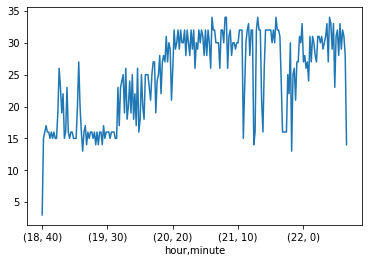

In [ ]:
df[df["session_id"]=='3511262826'].groupby(['hour', 'minute'])['minute'].count().plot()

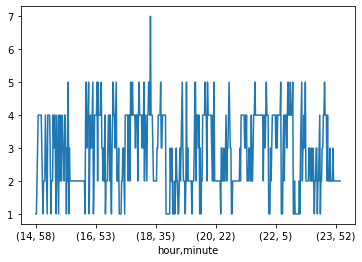

In [ ]:
df[df["session_id"]=='3510425374'].groupby(['hour', 'minute'])['minute'].count().plot()

In [ ]:
df[df["session_id"]=='3510425374'].groupby(['hour', 'minute'])['minute'].count()

hour  minute
14    58        1
      59        1
15    0         2
      1         3
      2         4
      3         4
      4         4
      5         4
      6         4
      7         4
      8         3
      9         2
      10        1
      17        2
      18        2
      19        2
      25        4
      26        3
      27        2
      28        1
      29        4
      30        4
      31        4
      32        4
      33        3
      34        1
      35        2
      36        2
      37        2
      38        4
      39        3
      40        4
      41        4
      44        2
      45        1
      46        4
      47        3
      48        2
      49        1
      50        4
      51        2
      52        4
      53        3
      54        2
      55        4
      56        3
      58        3
      59        2
16    0         4
      1         4
      2         3
      3         1
      4         3
      5         2
      6        

In [ ]:
3510425374

In [13]:
df_fe = df.copy()

In [15]:
df_fe = df_fe.drop(columns=['event_id', 'transaction_date'])

In [ ]:
df_gpby = df.groupby(['session_id', 'hour', 'minute'])['minute'].count()

In [ ]:
df_gpby.head()

session_id  hour  minute
3503162006  1     8         1
3505498857  0     1         1
                  6         1
                  12        1
                  17        1
Name: minute, dtype: int64

In [ ]:
df_gpby = pd.DataFrame({'count' : df_gpby}).reset_index()
df_gpby

In [ ]:
df_fe_mer = df_fe.merge(df_gpby, on=['session_id', 'hour', 'minute'],  how='left')

ValueError: ignored

In [ ]:
event_id 6044797
session_id 3586748
transaction_date 86400
event_type_id 26
product_id 2008439
title_product_id 21187
country_code_id 312
ip_address 1130066
auth_session_id 3213231
day 1
hour 24
minute 60
second 60

SyntaxError: ignored

In [17]:
df_fe.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6044797 entries, 0 to 6044796
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   session_id        6044797 non-null  object
 1   event_type_id     6043230 non-null  object
 2   product_id        6044797 non-null  int64 
 3   title_product_id  6044797 non-null  int64 
 4   country_code_id   6044462 non-null  object
 5   ip_address        6044797 non-null  object
 6   auth_session_id   5958585 non-null  object
 7   hour              6044797 non-null  int64 
 8   minute            6044797 non-null  int64 
 9   second            6044797 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 461.2+ MB


<ipython-input-17-c42737314e3e>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_fe.info(null_counts=True)


In [18]:
from sklearn.preprocessing import LabelEncoder
for col in ['session_id', 'event_type_id', 'product_id', 'title_product_id', 'country_code_id', 'ip_address', 'auth_session_id']:
  le = LabelEncoder()
  df_fe[col] = le.fit_transform(df_fe[col])

In [20]:
df_fe.to_parquet('/content/drive/MyDrive/datathon - final/df_encoded.parquet', index=False)

In [22]:
cols = df_fe.columns

In [23]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(df_fe)

X = pd.DataFrame(X, columns=[cols])

In [24]:
X.head()

,session_id,event_type_id,product_id,title_product_id,country_code_id,ip_address,auth_session_id,hour,minute,second
0,0.000662,0.384615,0.068731,0.010573,0.166667,0.618831,0.210554,0.0,0.0,0.0
1,0.000352,0.461538,0.674984,0.414000,0.131410,0.687136,0.210335,0.0,0.0,0.0
2,0.001130,0.461538,0.968329,0.385018,0.916667,0.549644,0.210858,0.0,0.0,0.0
3,0.001130,0.538462,0.008851,0.397243,0.583333,0.528085,0.210858,0.0,0.0,0.0
4,0.000857,0.384615,0.528087,0.603087,0.166667,0.195838,0.210986,0.0,0.0,0.0


In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [26]:
kmeans.cluster_centers_

array([[0.74662141, 0.29676654, 0.50156501, 0.32370131, 0.45706946,
        0.46897546, 0.64613762, 0.74521832, 0.50343695, 0.5009501 ],
       [0.27823791, 0.2957901 , 0.55735158, 0.31772818, 0.41948027,
        0.47975417, 0.26102538, 0.28759549, 0.49988083, 0.50114515]])

In [27]:
kmeans.inertia_

4025760.569240666

In [33]:
np.size(labels)

6044797

In [35]:
unique, counts = np.unique(labels, return_counts=True)

dict(zip(unique, counts))

{0: 2693036, 1: 3351761}

In [46]:
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
df_fe.to_parquet('/content/drive/MyDrive/datathon - final/df_encoded.parquet', index=False)

In [34]:
dict(zip(unique, counts))

{0: 1, 1: 1}

In [39]:
df_result = pd.DataFrame()
df_result['event_id'] = df['event_id']
df_result['crawler_flag'] = labels

In [41]:
df_result.to_parquet('/content/drive/MyDrive/datathon - final/df_result.parquet', index=False)

In [ ]:
df_result.to_

In [28]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

NameError: ignored

In [47]:
sid_list = []
for sid in df['session_id'].unique():
  uni =  df[df['session_id'] == sid]['ip_address'].nunique()
  if uni > 1:
    sid_list.append(sid)
    print(sid, uni)

3506402690 3
3506906504 2
3507029629 2
3507028359 2
3507038161 2
3507017441 2
3507030766 2
3506935799 2
3507038909 2
3506930790 2
3506996723 9
3507039821 2
3507037916 2
3507038957 2
3506985527 2
3507039717 2
3507039868 2
3507031940 3
3507010158 3
3506911327 5
3507039681 2
3507039973 3
3507036931 3
3506968018 3
3507029964 2
3507040838 2
3507040858 2
3507038447 2
3507030932 2
3507027873 2
3506961621 2
3507040092 2
3507034639 3
3507026463 2
3507040951 3


KeyboardInterrupt: ignored

In [ ]:
df[df['session_id']="3506996723"]

In [48]:
result = pd.read_parquet('/content/drive/MyDrive/datathon - final/df_result2.parquet')
result

KeyboardInterrupt: ignored